## Visual: "SPY: 20 Years of Market History and Resilience"

Note: ChatGPT was utilized in making this visual in the following ways:
1. Creating a double axis chart
2. Creating text boxes of events
3. Filling in space between the line and x-axis on the bottom chart
4. Creating the recession periods

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib.patches import Rectangle
import yfinance as yf
import re
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Load relevant SPY data
equity_data = pd.read_csv('equity_data.csv')
equity_data = equity_data[equity_data['Date'] >= '2005-01-01'].copy()
equity_data = equity_data[equity_data['Ticker'] == 'SPY'].copy()

In [66]:
# Define key market events
events = [
    ('2007-08-01', 'Subprime Crisis Begins', 'Credit concerns emerge', 'gray'),
    ('2008-09-15', 'Lehman Brothers Bankruptcy', 'Financial system near collapse', 'gray'),
    ('2010-05-06', 'Flash Crash', 'Market drops 9% in minutes', 'gray'),
    ('2015-01-01', 'Oil Crash Impact', 'Energy collapse affects markets', 'gray'),
    ('2018-03-01', 'Trade War Begins', 'China tariffs create uncertainty', 'gray'),
    ('2018-12-24', 'December 2018 Selloff', 'Worst December since 1931', 'gray'),
    ('2020-03-23', 'COVID Bottom', 'Fastest bear market in history (-34%)', 'gray'),
    # ('2021-01-28', 'GameStop Mania', 'Meme stocks highlight retail power', 'purple'),
    ('2023-03-10', 'Banking Crisis', 'SVB and Credit Suisse failures', 'gray'),
    # ('2023-11-01', 'AI Revolution', 'ChatGPT launches tech boom', 'green')
]

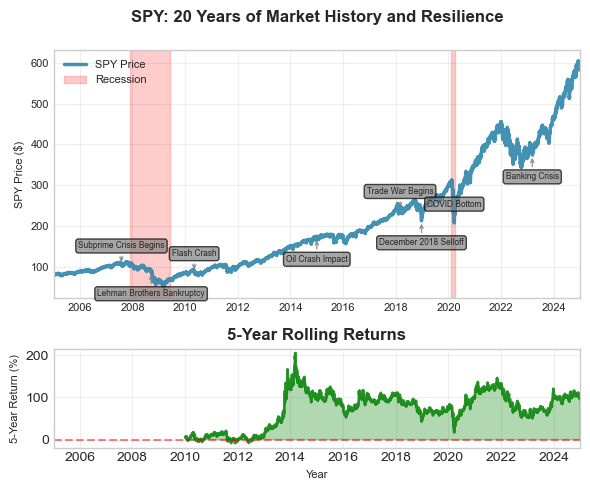

In [68]:
# Plot

# Set style for professional-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load data (replace with your actual data loading)
df = equity_data
df['Date'] = pd.to_datetime(df['Date'])

# metrics = calculate_performance_metrics(df)

# Create figure with subplots
fig = plt.figure(figsize=(6, 5))

# Main price chart
ax1 = plt.subplot(3, 1, (1, 2))  # Takes up top 2/3 of the plot

# Plot SPY price
ax1.plot(df['Date'], df['Close'], linewidth=2.5, color='#2E86AB', label='SPY Price', alpha=0.9)

# Add recession shading (approximate periods)
recession_periods = [
    ('2007-12-01', '2009-06-01'),  # Great Recession
    ('2020-02-01', '2020-04-01'),  # COVID Recession
]

for start, end in recession_periods:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), 
            alpha=0.2, color='red', label='Recession' if start == '2007-12-01' else "")

# Add event annotations
for i, (date, title, description, color) in enumerate(events):
    event_date = pd.to_datetime(date)
    if df['Date'].min() <= event_date <= df['Date'].max():
        # Find closest price
        closest_idx = (df['Date'] - event_date).abs().idxmin()
        price = df.loc[closest_idx, 'Close']
        
        # Alternate annotation positions to avoid overlap
        offset = 40 if i % 2 == 0 else -60
        
        ax1.annotate(title, 
                    xy=(event_date, price), 
                    xytext=(event_date, price + offset),
                    fontsize=6, 
                    ha='center',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.7),
                    arrowprops=dict(arrowstyle='->', color=color, alpha=0.8))

# Customize main chart
ax1.set_title('SPY: 20 Years of Market History and Resilience', 
            fontsize=12, fontweight='bold', pad=20)
ax1.set_ylabel('SPY Price ($)', fontsize=8)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=8)

# Format x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.set_xlim(df['Date'].min(), df['Date'].max())  # Add this line

# Rolling returns subplot
ax2 = plt.subplot(3, 1, 3)

# Calculate rolling 5-year returns
df['5Y_Return'] = df['Close'].pct_change(periods=252*5) * 100  # Approximate 5-year returns

ax2.plot(df['Date'], df['5Y_Return'], color='green', linewidth=2, alpha=0.8)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax2.fill_between(df['Date'], df['5Y_Return'], 0, 
                where=(df['5Y_Return'] > 0), color='green', alpha=0.3)
ax2.fill_between(df['Date'], df['5Y_Return'], 0, 
                where=(df['5Y_Return'] < 0), color='red', alpha=0.3)

ax2.set_title('5-Year Rolling Returns', fontsize=12, fontweight='bold')
ax2.set_ylabel('5-Year Return (%)', fontsize=8)
ax2.set_xlabel('Year', fontsize=8)
ax2.grid(True, alpha=0.3)

# Format bottom subplot x-axis
ax2.xaxis.set_major_locator(mdates.YearLocator(2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_xlim(df['Date'].min(), df['Date'].max())  # Add this line

plt.tight_layout()
plt.savefig("SPY Market History.svg", format="svg")
plt.show()